1. 下載資料

In [1]:
import time
import SpeechDownloader

t0= time.time()

gscInfo, nCategs= SpeechDownloader.PrepareGoogleSpeechCmd(
        version= 2, 
        task= '35word')

dt= time.time()-t0
print('SpeechDownloader.PrepareGoogleSpeechCmd(), dt(sec)= {}'.format(dt))

print('gscInfo.keys()= {}, nCategs= {}'.format(gscInfo.keys(), nCategs))


Google Speech commands dataset version 2 already exists. Skipping download.
Converting test set WAVs to numpy files


0it [00:00, ?it/s]


Converting training set WAVs to numpy files


0it [00:00, ?it/s]


Done preparing Google Speech commands dataset version 2
SpeechDownloader.PrepareGoogleSpeechCmd(), dt(sec)= 1.4956743717193604
gscInfo.keys()= dict_keys(['train', 'test', 'val', 'testREAL']), nCategs= 36


2. 觀賞資料

![dataDir.png](./dataDir.png)

![dataFile.png](./dataFile.png)



3. 資料劃分： 
    在 train 資料夾之下，
    先分為 validation_list, test_list, 
    其他才做為 train_list

validation_list.txt=[
- right/a69b9b3e_nohash_0.wav
- right/439c84f4_nohash_1.wav
- right/409c962a_nohash_1.wav
- right/dbaf8fc6_nohash_2.wav
- right/a6d586b7_nohash_1.wav
- right/0e17f595_nohash_1.wav
- right/ff2b842e_nohash_3.wav
- right/7fd25f7c_nohash_2.wav
- right/3cc595de_nohash_4.wav
- right/591d32f3_nohash_0.wav
- :
- :
]

testing_list.txt=[
- right/bb05582b_nohash_3.wav
- right/97f4c236_nohash_2.wav
- right/f2e59fea_nohash_3.wav
- right/fdb5155e_nohash_2.wav
- right/dc75148d_nohash_0.wav
- right/3f170018_nohash_0.wav
- right/18f8afd5_nohash_3.wav
- right/e1469561_nohash_1.wav
- right/5c8af87a_nohash_0.wav
- right/aa48c94a_nohash_0.wav
- :
- :
]


In [ ]:
type(gscInfo)  # dict
gscInfo.keys() # dict_keys(['train', 'test', 'val', 'testREAL'])
type(gscInfo['train']) # dic
gscInfo['train'].keys() # dict_keys(['files', 'labels'])
type(gscInfo['train']['files']) # list
len(gscInfo['train']['files']) # 84849

gscInfo['train']['files'][0:10]
'''
['sd_GSCmdV2/train/up/9a8d8d34_nohash_0.wav.npy',
 'sd_GSCmdV2/train/stop/62605293_nohash_0.wav.npy',
 'sd_GSCmdV2/train/off/a1cff772_nohash_1.wav.npy',
 'sd_GSCmdV2/train/three/5b09db89_nohash_2.wav.npy',
 'sd_GSCmdV2/train/bird/50d1c8e3_nohash_2.wav.npy',
 'sd_GSCmdV2/train/two/5ab63b0a_nohash_0.wav.npy',
 'sd_GSCmdV2/train/marvin/bfaf2000_nohash_1.wav.npy',
 'sd_GSCmdV2/train/six/a04817c2_nohash_1.wav.npy',
 'sd_GSCmdV2/train/eight/69953f48_nohash_0.wav.npy',
 'sd_GSCmdV2/train/one/dcbfe008_nohash_0.wav.npy']
'''

gscInfo['train']['labels']
'''
{'sd_GSCmdV2/train/up/9a8d8d34_nohash_0.wav.npy': 4,
 'sd_GSCmdV2/train/stop/62605293_nohash_0.wav.npy': 10,
 'sd_GSCmdV2/train/off/a1cff772_nohash_1.wav.npy': 9,
 'sd_GSCmdV2/train/three/5b09db89_nohash_2.wav.npy': 15,
 'sd_GSCmdV2/train/bird/50d1c8e3_nohash_2.wav.npy': 23,
 'sd_GSCmdV2/train/two/5ab63b0a_nohash_0.wav.npy': 14,
 'sd_GSCmdV2/train/marvin/bfaf2000_nohash_1.wav.npy': 31,
 'sd_GSCmdV2/train/six/a04817c2_nohash_1.wav.npy': 18,
 'sd_GSCmdV2/train/eight/69953f48_nohash_0.wav.npy': 20,
 'sd_GSCmdV2/train/one/dcbfe008_nohash_0.wav.npy': 13,
 :
 :
'''

In [ ]:
for s in gscInfo.keys(): 
    for t in gscInfo[s].keys():
        a= '{}, {}, len= {} '.format(s,t,len(gscInfo[s][t]))
        print(a)
_='''
train, files, len= 84849 
train, labels, len= 84849 
test, files, len= 11005 
test, labels, len= 11005 
val, files, len= 9981 
val, labels, len= 9981 
testREAL, files, len= 4890 
testREAL, labels, len= 4890 
110725
'''
# 84849+11005+9981+4890==110725        

In [ ]:
gscInfo

_= '''
{'train': {'files': ['sd_GSCmdV2/train/up/9a8d8d34_nohash_0.wav.npy',
   'sd_GSCmdV2/train/stop/62605293_nohash_0.wav.npy',
   'sd_GSCmdV2/train/off/a1cff772_nohash_1.wav.npy',
   'sd_GSCmdV2/train/three/5b09db89_nohash_2.wav.npy',
   'sd_GSCmdV2/train/bird/50d1c8e3_nohash_2.wav.npy',
   'sd_GSCmdV2/train/two/5ab63b0a_nohash_0.wav.npy',
   'sd_GSCmdV2/train/marvin/bfaf2000_nohash_1.wav.npy',
   :
   :
'''

In [42]:
import numpy as np
import pylab as pl

x0= np.load('sd_GSCmdV2/train/up/9a8d8d34_nohash_0.wav.npy')

fn= gscInfo['train']['files'][1]
x1= np.load(fn)

fn= gscInfo['train']['files'][-1]
x2= np.load(fn)

((16000,),
 dtype('float32'),
 [<matplotlib.lines.Line2D at 0x231ecd2e308>])

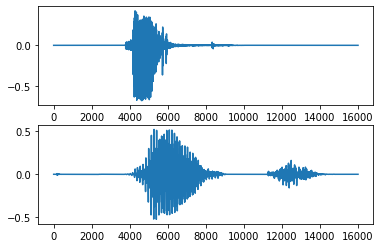

In [54]:
x0.shape, x0.dtype, pl.subplot(2,1,1), pl.plot(x0)
x2.shape, x2.dtype, pl.subplot(2,1,2), pl.plot(x2)

In [55]:
import sounddevice as sd

sd.play(x0, samplerate=16000)
sd.wait()
sd.play(x2, samplerate=16000)
sd.wait()


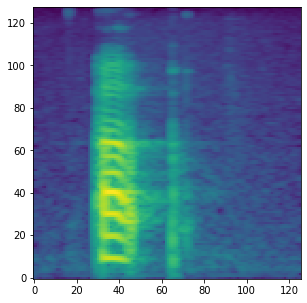

In [70]:
import librosa

X= librosa.feature.melspectrogram(
    x0, 
    sr=       16000, 
    n_fft=     1024, 
    hop_length= 128)

X= np.log(X)

pl.figure(figsize=(5,5))
pl.imshow(X, origin= 'low')

In [78]:
# load all data into memory
# 有些檔案長度不為 1 sec，要 normalize 成 1 sec= 16000


def ryLengthNormalize(x, length=16000):
    #curX could be bigger or smaller than self.dim
    if len(x) == length:
        X= x
        #print('Same dim')
    elif len(x) > length: #bigger
        #we can choose any position in curX-self.dim
        randPos= np.random.randint(len(x)-length)
        X= x[randPos:randPos+length]
        #print('File dim bigger')
    else: #smaller
        randPos= np.random.randint(length-len(x))
        
        X= np.random.random(length)*1e-10
        
        X[randPos:randPos+len(x)]= x
        #print('File dim smaller')
    return X
    
    



from tqdm import tqdm
import time

t0= time.time()

xT= []
for s in tqdm(['testREAL', 'test', 'val', 'train']):
    xL=[]
    yL=[]
    for fn in tqdm(gscInfo[s]['files']):

        x= np.load(fn)
        
        x= ryLengthNormalize(x)
        
        
        y= gscInfo[s]['labels'][fn]
        xL+= [x]
        yL+= [y]
    xA= np.vstack(xL)
    yA= np.array(yL)

    xT+= [(xA, yA)]

[(x_testREAL, y_testREAL),
(x_test, y_test),
(x_val, y_val),
(x_train, y_train)]= xT

dt= time.time()-t0

print('load all data into memory ... dt(sec)= {}'.format(dt))

# load all data into memory ... dt(sec)= 776 


  0%|                             | 0/4 [00:00<?, ?it/s]

  0%|                          | 0/4890 [00:00<?, ?it/s]

  7%|█             | 350/4890 [00:00<00:01, 3473.92it/s]

 14%|█▉            | 693/4890 [00:00<00:01, 3452.88it/s]

 21%|██▊          | 1040/4890 [00:00<00:01, 3450.46it/s]

 28%|███▋         | 1386/4890 [00:00<00:01, 3445.78it/s]

 36%|████▋        | 1740/4890 [00:00<00:00, 3466.14it/s]

 43%|█████▌       | 2084/4890 [00:00<00:00, 3450.57it/s]

 50%|██████▍      | 2434/4890 [00:00<00:00, 3458.08it/s]

 57%|███████▎     | 2769/4890 [00:00<00:00, 3416.99it/s]

 64%|████████▎    | 3115/4890 [00:00<00:00, 3422.27it/s]

 71%|█████████▏   | 3461/4890 [00:01<00:00, 3426.08it/s]

 78%|██████████   | 3808/4890 [00:01<00:00, 3431.63it/s]

 85%|███████████  | 4163/4890 [00:01<00:00, 3459.07it/s]

 92%|███████████▉ | 4508/4890 [00:01<00:00, 3448.71it/s]

100%|█████████████| 4890/4890 [00:01<00:00, 3431.06it/s]

 25%|█████▎               | 1/4 [00:01<00:04,  1.57s/it]

  0%|        

 14%|█▉            | 1375/9981 [00:12<01:10, 122.15it/s]

 14%|█▉            | 1389/9981 [00:12<01:19, 108.33it/s]

 14%|█▉            | 1405/9981 [00:12<01:13, 117.41it/s]

 14%|█▉            | 1418/9981 [00:12<01:14, 114.26it/s]

 14%|██            | 1432/9981 [00:12<01:12, 117.59it/s]

 14%|██            | 1445/9981 [00:12<01:12, 117.12it/s]

 15%|██            | 1465/9981 [00:12<01:03, 133.33it/s]

 15%|██            | 1484/9981 [00:12<00:59, 143.96it/s]

 15%|██            | 1500/9981 [00:13<00:58, 144.37it/s]

 15%|██▏           | 1516/9981 [00:13<01:11, 118.55it/s]

 15%|██▏           | 1534/9981 [00:13<01:04, 131.85it/s]

 16%|██▏           | 1549/9981 [00:13<01:02, 134.95it/s]

 16%|██▏           | 1570/9981 [00:13<00:55, 150.85it/s]

 16%|██▏           | 1597/9981 [00:13<00:48, 171.88it/s]

 16%|██▎           | 1619/9981 [00:13<00:45, 183.17it/s]

 16%|██▎           | 1639/9981 [00:13<00:46, 177.95it/s]

 17%|██▎           | 1658/9981 [00:14<00:48, 171.60it/s]

 17%|██▎      

 37%|█████▏        | 3660/9981 [00:29<00:52, 119.58it/s]

 37%|█████▏        | 3678/9981 [00:30<00:48, 130.51it/s]

 37%|█████▏        | 3693/9981 [00:30<00:46, 134.80it/s]

 37%|█████▏        | 3718/9981 [00:30<00:41, 149.36it/s]

 37%|█████▏        | 3735/9981 [00:30<00:44, 140.97it/s]

 38%|█████▎        | 3751/9981 [00:30<00:45, 136.48it/s]

 38%|█████▎        | 3768/9981 [00:30<00:55, 112.93it/s]

 38%|█████▎        | 3781/9981 [00:30<01:00, 102.15it/s]

 38%|█████▎        | 3794/9981 [00:30<00:56, 108.88it/s]

 38%|█████▎        | 3813/9981 [00:31<00:49, 124.58it/s]

 38%|█████▍        | 3833/9981 [00:31<00:44, 139.36it/s]

 39%|█████▍        | 3851/9981 [00:31<00:44, 138.02it/s]

 39%|█████▍        | 3866/9981 [00:31<00:43, 140.47it/s]

 39%|█████▍        | 3881/9981 [00:31<00:45, 133.88it/s]

 39%|█████▍        | 3898/9981 [00:31<00:42, 141.95it/s]

 39%|█████▍        | 3915/9981 [00:31<00:41, 147.61it/s]

 39%|█████▌        | 3931/9981 [00:31<00:45, 132.71it/s]

 40%|█████▌   

 59%|████████▎     | 5897/9981 [00:47<00:31, 130.07it/s]

 59%|████████▎     | 5915/9981 [00:47<00:28, 141.28it/s]

 59%|████████▎     | 5931/9981 [00:47<00:31, 129.40it/s]

 60%|████████▎     | 5946/9981 [00:47<00:30, 133.85it/s]

 60%|████████▎     | 5961/9981 [00:47<00:29, 138.31it/s]

 60%|████████▍     | 5976/9981 [00:47<00:29, 137.85it/s]

 60%|████████▍     | 5991/9981 [00:48<00:32, 122.63it/s]

 60%|████████▍     | 6005/9981 [00:48<00:32, 124.21it/s]

 60%|█████████      | 6018/9981 [00:48<00:47, 83.67it/s]

 60%|█████████      | 6032/9981 [00:48<00:41, 95.02it/s]

 61%|█████████      | 6044/9981 [00:48<00:40, 97.89it/s]

 61%|████████▌     | 6061/9981 [00:48<00:35, 111.53it/s]

 61%|████████▌     | 6074/9981 [00:48<00:35, 110.32it/s]

 61%|████████▌     | 6092/9981 [00:48<00:31, 123.78it/s]

 61%|████████▌     | 6112/9981 [00:49<00:28, 136.39it/s]

 61%|████████▌     | 6127/9981 [00:49<00:28, 136.05it/s]

 62%|████████▌     | 6143/9981 [00:49<00:27, 138.54it/s]

 62%|████████▋

 81%|███████████▍  | 8124/9981 [01:05<00:12, 146.15it/s]

 82%|███████████▍  | 8140/9981 [01:05<00:12, 141.89it/s]

 82%|███████████▍  | 8155/9981 [01:06<00:13, 137.44it/s]

 82%|███████████▍  | 8172/9981 [01:06<00:12, 141.04it/s]

 82%|███████████▍  | 8187/9981 [01:06<00:13, 131.05it/s]

 82%|███████████▌  | 8202/9981 [01:06<00:13, 135.81it/s]

 82%|███████████▌  | 8218/9981 [01:06<00:12, 142.22it/s]

 83%|███████████▌  | 8241/9981 [01:06<00:10, 158.86it/s]

 83%|███████████▌  | 8258/9981 [01:06<00:11, 154.50it/s]

 83%|████████████▍  | 8275/9981 [01:07<00:17, 97.09it/s]

 83%|███████████▋  | 8288/9981 [01:07<00:16, 104.80it/s]

 83%|███████████▋  | 8301/9981 [01:07<00:15, 105.01it/s]

 83%|███████████▋  | 8315/9981 [01:07<00:14, 112.82it/s]

 83%|███████████▋  | 8328/9981 [01:07<00:15, 109.20it/s]

 84%|███████████▋  | 8341/9981 [01:07<00:14, 113.23it/s]

 84%|███████████▋  | 8361/9981 [01:07<00:12, 127.21it/s]

 84%|███████████▊  | 8379/9981 [01:07<00:11, 139.26it/s]

 84%|█████████

  0%|              | 191/84849 [00:01<12:38, 111.61it/s]

  0%|              | 204/84849 [00:02<12:58, 108.71it/s]

  0%|              | 216/84849 [00:02<12:39, 111.50it/s]

  0%|              | 237/84849 [00:02<10:54, 129.25it/s]

  0%|              | 252/84849 [00:02<11:01, 127.84it/s]

  0%|              | 270/84849 [00:02<10:25, 135.16it/s]

  0%|              | 285/84849 [00:02<10:50, 129.94it/s]

  0%|              | 306/84849 [00:02<09:37, 146.42it/s]

  0%|              | 323/84849 [00:02<09:13, 152.65it/s]

  0%|              | 340/84849 [00:02<10:24, 135.23it/s]

  0%|              | 358/84849 [00:03<09:40, 145.63it/s]

  0%|              | 374/84849 [00:03<09:58, 141.22it/s]

  0%|              | 389/84849 [00:03<13:15, 106.13it/s]

  0%|              | 404/84849 [00:03<12:06, 116.23it/s]

  0%|              | 419/84849 [00:03<11:25, 123.09it/s]

  1%|              | 436/84849 [00:03<10:29, 134.02it/s]

  1%|              | 451/84849 [00:03<11:20, 123.96it/s]

  1%|         

  3%|▍            | 2473/84849 [00:19<11:02, 124.37it/s]

  3%|▍            | 2488/84849 [00:19<10:36, 129.42it/s]

  3%|▍            | 2503/84849 [00:20<10:27, 131.30it/s]

  3%|▍            | 2518/84849 [00:20<10:18, 133.19it/s]

  3%|▍            | 2533/84849 [00:20<12:32, 109.43it/s]

  3%|▍            | 2546/84849 [00:20<13:19, 102.92it/s]

  3%|▍            | 2561/84849 [00:20<12:09, 112.88it/s]

  3%|▍            | 2574/84849 [00:20<12:32, 109.37it/s]

  3%|▍            | 2590/84849 [00:20<11:24, 120.12it/s]

  3%|▍            | 2605/84849 [00:20<10:50, 126.44it/s]

  3%|▍            | 2623/84849 [00:20<09:53, 138.63it/s]

  3%|▍             | 2638/84849 [00:21<15:04, 90.91it/s]

  3%|▍            | 2655/84849 [00:21<13:01, 105.11it/s]

  3%|▍            | 2674/84849 [00:21<11:20, 120.71it/s]

  3%|▍            | 2693/84849 [00:21<10:22, 132.08it/s]

  3%|▍            | 2712/84849 [00:21<09:33, 143.21it/s]

  3%|▍            | 2730/84849 [00:21<08:59, 152.08it/s]

  3%|▍        

  6%|▋            | 4724/84849 [00:37<09:19, 143.30it/s]

  6%|▋            | 4743/84849 [00:37<08:41, 153.62it/s]

  6%|▋            | 4759/84849 [00:37<09:31, 140.24it/s]

  6%|▋            | 4778/84849 [00:37<09:17, 143.54it/s]

  6%|▋            | 4796/84849 [00:38<10:17, 129.55it/s]

  6%|▋            | 4810/84849 [00:38<10:22, 128.67it/s]

  6%|▋            | 4824/84849 [00:38<10:17, 129.57it/s]

  6%|▋            | 4841/84849 [00:38<09:58, 133.67it/s]

  6%|▋            | 4859/84849 [00:38<09:16, 143.81it/s]

  6%|▋            | 4874/84849 [00:38<10:56, 121.77it/s]

  6%|▋            | 4891/84849 [00:38<10:00, 133.05it/s]

  6%|▊            | 4907/84849 [00:38<09:48, 135.78it/s]

  6%|▊            | 4922/84849 [00:39<12:07, 109.87it/s]

  6%|▊            | 4943/84849 [00:39<10:31, 126.62it/s]

  6%|▊            | 4958/84849 [00:39<10:16, 129.58it/s]

  6%|▊            | 4973/84849 [00:39<10:04, 132.09it/s]

  6%|▊            | 4988/84849 [00:39<09:46, 136.24it/s]

  6%|▊        

  8%|█            | 6952/84849 [00:55<09:09, 141.75it/s]

  8%|█            | 6968/84849 [00:55<11:09, 116.34it/s]

  8%|█            | 6986/84849 [00:55<09:58, 130.00it/s]

  8%|█            | 7001/84849 [00:55<10:23, 124.89it/s]

  8%|█▏            | 7015/84849 [00:55<14:12, 91.27it/s]

  8%|█▏            | 7027/84849 [00:55<13:37, 95.25it/s]

  8%|█▏            | 7039/84849 [00:55<14:05, 91.99it/s]

  8%|█            | 7059/84849 [00:56<11:51, 109.38it/s]

  8%|█▏            | 7073/84849 [00:56<14:28, 89.59it/s]

  8%|█            | 7089/84849 [00:56<12:33, 103.17it/s]

  8%|█            | 7108/84849 [00:56<10:52, 119.18it/s]

  8%|█            | 7123/84849 [00:56<10:25, 124.31it/s]

  8%|█            | 7138/84849 [00:56<10:16, 126.05it/s]

  8%|█            | 7158/84849 [00:56<09:18, 139.21it/s]

  8%|█            | 7174/84849 [00:56<09:58, 129.88it/s]

  8%|█            | 7189/84849 [00:57<10:24, 124.35it/s]

  8%|█            | 7211/84849 [00:57<09:03, 142.75it/s]

  9%|█        

 11%|█▍           | 9218/84849 [01:12<10:59, 114.66it/s]

 11%|█▍           | 9235/84849 [01:12<10:02, 125.44it/s]

 11%|█▍           | 9252/84849 [01:12<09:19, 135.05it/s]

 11%|█▍           | 9270/84849 [01:12<08:39, 145.60it/s]

 11%|█▍           | 9289/84849 [01:13<08:06, 155.46it/s]

 11%|█▍           | 9307/84849 [01:13<07:54, 159.20it/s]

 11%|█▍           | 9324/84849 [01:13<07:49, 160.82it/s]

 11%|█▍           | 9341/84849 [01:13<07:52, 159.92it/s]

 11%|█▍           | 9358/84849 [01:13<11:56, 105.30it/s]

 11%|█▍           | 9372/84849 [01:13<11:33, 108.91it/s]

 11%|█▍           | 9393/84849 [01:13<09:55, 126.61it/s]

 11%|█▍           | 9409/84849 [01:13<09:47, 128.42it/s]

 11%|█▍           | 9424/84849 [01:14<09:26, 133.08it/s]

 11%|█▍           | 9439/84849 [01:14<09:33, 131.39it/s]

 11%|█▍           | 9456/84849 [01:14<09:09, 137.18it/s]

 11%|█▍           | 9475/84849 [01:14<08:25, 149.21it/s]

 11%|█▍           | 9492/84849 [01:14<08:09, 153.84it/s]

 11%|█▍       

 14%|█▋          | 11577/84849 [01:30<09:31, 128.30it/s]

 14%|█▊           | 11591/84849 [01:30<12:18, 99.15it/s]

 14%|█▊           | 11603/84849 [01:30<13:00, 93.80it/s]

 14%|█▋          | 11622/84849 [01:30<11:10, 109.18it/s]

 14%|█▋          | 11635/84849 [01:30<11:04, 110.14it/s]

 14%|█▋          | 11648/84849 [01:31<10:35, 115.21it/s]

 14%|█▋          | 11665/84849 [01:31<09:52, 123.56it/s]

 14%|█▋          | 11680/84849 [01:31<09:30, 128.18it/s]

 14%|█▋          | 11694/84849 [01:31<10:14, 118.98it/s]

 14%|█▋          | 11709/84849 [01:31<09:38, 126.39it/s]

 14%|█▋          | 11725/84849 [01:31<09:06, 133.70it/s]

 14%|█▋          | 11739/84849 [01:31<09:16, 131.48it/s]

 14%|█▋          | 11753/84849 [01:31<09:52, 123.33it/s]

 14%|█▊           | 11766/84849 [01:32<13:08, 92.69it/s]

 14%|█▋          | 11779/84849 [01:32<12:08, 100.33it/s]

 14%|█▋          | 11796/84849 [01:32<10:57, 111.05it/s]

 14%|█▋          | 11811/84849 [01:32<10:18, 118.01it/s]

 14%|█▋       

 16%|██           | 13703/84849 [01:49<18:18, 64.74it/s]

 16%|██           | 13719/84849 [01:49<16:34, 71.50it/s]

 16%|██           | 13730/84849 [01:49<20:47, 57.02it/s]

 16%|██           | 13741/84849 [01:49<17:48, 66.54it/s]

 16%|██           | 13756/84849 [01:49<15:16, 77.56it/s]

 16%|██           | 13767/84849 [01:49<14:02, 84.36it/s]

 16%|█▉          | 13786/84849 [01:50<11:42, 101.13it/s]

 16%|██           | 13799/84849 [01:50<12:37, 93.82it/s]

 16%|█▉          | 13816/84849 [01:50<11:19, 104.49it/s]

 16%|█▉          | 13829/84849 [01:50<10:56, 108.13it/s]

 16%|█▉          | 13849/84849 [01:50<09:26, 125.23it/s]

 16%|██           | 13864/84849 [01:50<12:26, 95.04it/s]

 16%|██▏          | 13876/84849 [01:50<12:46, 92.54it/s]

 16%|██▏          | 13887/84849 [01:51<13:28, 87.72it/s]

 16%|██▏          | 13898/84849 [01:51<13:42, 86.22it/s]

 16%|██▏          | 13908/84849 [01:51<13:31, 87.42it/s]

 16%|██▏          | 13918/84849 [01:51<14:35, 81.00it/s]

 16%|██▏      

 19%|██▏         | 15761/84849 [02:07<08:32, 134.85it/s]

 19%|██▏         | 15779/84849 [02:08<08:05, 142.27it/s]

 19%|██▏         | 15795/84849 [02:08<08:57, 128.38it/s]

 19%|██▏         | 15813/84849 [02:08<08:12, 140.05it/s]

 19%|██▏         | 15829/84849 [02:08<08:06, 142.00it/s]

 19%|██▏         | 15845/84849 [02:08<08:02, 142.97it/s]

 19%|██▏         | 15860/84849 [02:08<08:17, 138.60it/s]

 19%|██▍          | 15875/84849 [02:08<11:53, 96.70it/s]

 19%|██▍          | 15887/84849 [02:09<14:13, 80.79it/s]

 19%|██▍          | 15897/84849 [02:09<16:06, 71.32it/s]

 19%|██▍          | 15907/84849 [02:09<14:56, 76.90it/s]

 19%|██▍          | 15917/84849 [02:09<13:54, 82.60it/s]

 19%|██▍          | 15933/84849 [02:09<12:04, 95.07it/s]

 19%|██▍          | 15944/84849 [02:09<11:37, 98.84it/s]

 19%|██▎         | 15965/84849 [02:09<09:59, 114.91it/s]

 19%|██▎         | 15979/84849 [02:09<10:03, 114.20it/s]

 19%|██▍          | 15992/84849 [02:10<14:35, 78.69it/s]

 19%|██▍      

 21%|██▋          | 17810/84849 [02:29<19:12, 58.15it/s]

 21%|██▋          | 17822/84849 [02:29<16:31, 67.57it/s]

 21%|██▋          | 17838/84849 [02:29<13:42, 81.45it/s]

 21%|██▋          | 17856/84849 [02:29<11:39, 95.74it/s]

 21%|██▌         | 17875/84849 [02:29<09:56, 112.37it/s]

 21%|██▌         | 17896/84849 [02:29<08:55, 125.03it/s]

 21%|██▌         | 17912/84849 [02:30<09:22, 119.03it/s]

 21%|██▌         | 17926/84849 [02:30<09:03, 123.16it/s]

 21%|██▌         | 17940/84849 [02:30<08:57, 124.46it/s]

 21%|██▌         | 17954/84849 [02:30<09:54, 112.47it/s]

 21%|██▌         | 17967/84849 [02:30<10:40, 104.36it/s]

 21%|██▌         | 17983/84849 [02:30<09:34, 116.39it/s]

 21%|██▌         | 18001/84849 [02:30<08:34, 129.96it/s]

 21%|██▌         | 18016/84849 [02:30<08:13, 135.35it/s]

 21%|██▌         | 18031/84849 [02:30<08:08, 136.85it/s]

 21%|██▌         | 18046/84849 [02:31<07:58, 139.68it/s]

 21%|██▌         | 18061/84849 [02:31<08:29, 130.96it/s]

 21%|██▌      

 24%|███          | 20050/84849 [02:48<18:41, 57.77it/s]

 24%|███          | 20066/84849 [02:48<15:12, 71.02it/s]

 24%|███          | 20079/84849 [02:48<13:09, 82.00it/s]

 24%|███          | 20098/84849 [02:49<10:55, 98.71it/s]

 24%|███          | 20113/84849 [02:49<12:08, 88.86it/s]

 24%|██▊         | 20131/84849 [02:49<10:19, 104.51it/s]

 24%|███          | 20146/84849 [02:49<11:05, 97.25it/s]

 24%|███          | 20159/84849 [02:49<12:42, 84.83it/s]

 24%|██▊         | 20180/84849 [02:49<10:34, 101.90it/s]

 24%|██▊         | 20195/84849 [02:49<09:34, 112.48it/s]

 24%|██▊         | 20209/84849 [02:50<09:32, 112.98it/s]

 24%|██▊         | 20222/84849 [02:50<09:52, 109.14it/s]

 24%|██▊         | 20235/84849 [02:50<09:43, 110.74it/s]

 24%|██▊         | 20256/84849 [02:50<08:28, 127.12it/s]

 24%|██▊         | 20271/84849 [02:50<08:21, 128.79it/s]

 24%|██▊         | 20286/84849 [02:50<08:09, 131.94it/s]

 24%|██▊         | 20300/84849 [02:50<08:52, 121.25it/s]

 24%|██▊      

 26%|███▏        | 22194/84849 [03:06<09:11, 113.60it/s]

 26%|███▏        | 22206/84849 [03:06<09:15, 112.73it/s]

 26%|███▏        | 22219/84849 [03:06<08:55, 116.87it/s]

 26%|███▏        | 22235/84849 [03:06<09:48, 106.39it/s]

 26%|███▏        | 22248/84849 [03:06<09:20, 111.75it/s]

 26%|███▏        | 22260/84849 [03:07<09:36, 108.47it/s]

 26%|███▏        | 22272/84849 [03:07<09:26, 110.47it/s]

 26%|███▏        | 22287/84849 [03:07<08:48, 118.45it/s]

 26%|███▏        | 22301/84849 [03:07<08:43, 119.44it/s]

 26%|███▏        | 22316/84849 [03:07<08:17, 125.75it/s]

 26%|███▏        | 22331/84849 [03:07<09:31, 109.34it/s]

 26%|███▏        | 22351/84849 [03:07<08:16, 125.95it/s]

 26%|███▏        | 22369/84849 [03:07<07:50, 132.90it/s]

 26%|███▏        | 22386/84849 [03:07<07:20, 141.77it/s]

 26%|███▏        | 22402/84849 [03:08<08:57, 116.13it/s]

 26%|███▏        | 22415/84849 [03:08<09:22, 110.93it/s]

 26%|███▏        | 22431/84849 [03:08<09:00, 115.38it/s]

 26%|███▏     

 29%|███▍        | 24317/84849 [03:23<07:28, 134.92it/s]

 29%|███▍        | 24332/84849 [03:23<07:18, 137.94it/s]

 29%|███▍        | 24352/84849 [03:23<06:41, 150.78it/s]

 29%|███▍        | 24369/84849 [03:24<06:35, 152.96it/s]

 29%|███▍        | 24388/84849 [03:24<06:15, 160.95it/s]

 29%|███▍        | 24410/84849 [03:24<05:59, 168.24it/s]

 29%|███▍        | 24428/84849 [03:24<06:26, 156.38it/s]

 29%|███▍        | 24445/84849 [03:24<06:31, 154.47it/s]

 29%|███▍        | 24461/84849 [03:24<07:10, 140.37it/s]

 29%|███▍        | 24477/84849 [03:24<06:54, 145.70it/s]

 29%|███▍        | 24499/84849 [03:24<06:12, 161.99it/s]

 29%|███▍        | 24517/84849 [03:25<06:21, 157.95it/s]

 29%|███▍        | 24534/84849 [03:25<07:28, 134.45it/s]

 29%|███▍        | 24551/84849 [03:25<07:03, 142.30it/s]

 29%|███▍        | 24567/84849 [03:25<08:05, 124.25it/s]

 29%|███▍        | 24581/84849 [03:25<08:59, 111.72it/s]

 29%|███▍        | 24609/84849 [03:25<07:23, 135.91it/s]

 29%|███▍     

 31%|███▊        | 26559/84849 [03:41<07:57, 122.14it/s]

 31%|███▊        | 26575/84849 [03:41<07:39, 126.94it/s]

 31%|███▊        | 26589/84849 [03:41<07:55, 122.46it/s]

 31%|███▊        | 26602/84849 [03:42<07:50, 123.70it/s]

 31%|███▊        | 26618/84849 [03:42<07:20, 132.25it/s]

 31%|███▊        | 26637/84849 [03:42<06:40, 145.45it/s]

 31%|███▊        | 26653/84849 [03:42<07:56, 122.07it/s]

 31%|███▊        | 26670/84849 [03:42<07:19, 132.47it/s]

 31%|███▊        | 26685/84849 [03:42<07:29, 129.33it/s]

 31%|███▊        | 26699/84849 [03:42<08:11, 118.30it/s]

 31%|███▊        | 26712/84849 [03:42<08:09, 118.83it/s]

 32%|███▊        | 26730/84849 [03:43<07:21, 131.63it/s]

 32%|███▊        | 26744/84849 [03:43<09:05, 106.59it/s]

 32%|███▊        | 26757/84849 [03:43<08:54, 108.78it/s]

 32%|████         | 26769/84849 [03:43<09:49, 98.47it/s]

 32%|███▊        | 26784/84849 [03:43<08:58, 107.86it/s]

 32%|████         | 26796/84849 [03:43<10:26, 92.62it/s]

 32%|████     

 34%|████        | 28759/84849 [03:59<07:09, 130.69it/s]

 34%|████        | 28780/84849 [03:59<06:32, 142.70it/s]

 34%|████        | 28796/84849 [03:59<06:55, 134.82it/s]

 34%|████        | 28815/84849 [03:59<06:19, 147.53it/s]

 34%|████        | 28831/84849 [03:59<06:32, 142.57it/s]

 34%|████        | 28847/84849 [03:59<06:37, 141.03it/s]

 34%|████        | 28862/84849 [03:59<06:37, 140.80it/s]

 34%|████        | 28877/84849 [03:59<06:42, 138.89it/s]

 34%|████        | 28892/84849 [04:00<07:06, 131.12it/s]

 34%|████        | 28907/84849 [04:00<07:05, 131.52it/s]

 34%|████        | 28929/84849 [04:00<06:18, 147.83it/s]

 34%|████        | 28949/84849 [04:00<05:50, 159.42it/s]

 34%|████        | 28966/84849 [04:00<05:50, 159.28it/s]

 34%|████        | 28983/84849 [04:00<05:53, 158.21it/s]

 34%|████        | 29008/84849 [04:00<05:28, 169.81it/s]

 34%|████        | 29026/84849 [04:00<05:57, 156.23it/s]

 34%|████        | 29047/84849 [04:00<05:33, 167.31it/s]

 34%|████     

 37%|████▍       | 31017/84849 [04:16<06:15, 143.37it/s]

 37%|████▍       | 31032/84849 [04:16<06:40, 134.46it/s]

 37%|████▊        | 31046/84849 [04:16<09:22, 95.67it/s]

 37%|████▍       | 31062/84849 [04:16<08:15, 108.45it/s]

 37%|████▍       | 31080/84849 [04:16<08:00, 111.93it/s]

 37%|████▍       | 31101/84849 [04:17<06:56, 129.09it/s]

 37%|████▍       | 31116/84849 [04:17<08:41, 103.10it/s]

 37%|████▍       | 31129/84849 [04:17<08:10, 109.50it/s]

 37%|████▍       | 31145/84849 [04:17<07:31, 118.92it/s]

 37%|████▍       | 31159/84849 [04:17<08:34, 104.32it/s]

 37%|████▍       | 31175/84849 [04:17<07:41, 116.30it/s]

 37%|████▍       | 31188/84849 [04:17<07:34, 118.07it/s]

 37%|████▍       | 31201/84849 [04:18<08:01, 111.34it/s]

 37%|████▍       | 31214/84849 [04:18<07:45, 115.31it/s]

 37%|████▍       | 31227/84849 [04:18<08:39, 103.23it/s]

 37%|████▊        | 31238/84849 [04:18<10:22, 86.11it/s]

 37%|████▊        | 31252/84849 [04:18<09:16, 96.26it/s]

 37%|████▊    

 39%|████▋       | 33286/84849 [04:34<07:52, 109.06it/s]

 39%|████▋       | 33306/84849 [04:34<06:58, 123.04it/s]

 39%|████▋       | 33324/84849 [04:34<06:21, 135.12it/s]

 39%|████▋       | 33339/84849 [04:34<06:10, 138.92it/s]

 39%|████▋       | 33354/84849 [04:34<06:08, 139.90it/s]

 39%|████▋       | 33369/84849 [04:34<06:10, 138.86it/s]

 39%|████▋       | 33384/84849 [04:34<07:26, 115.34it/s]

 39%|████▋       | 33397/84849 [04:35<08:23, 102.18it/s]

 39%|█████        | 33409/84849 [04:35<09:58, 85.95it/s]

 39%|█████        | 33425/84849 [04:35<08:38, 99.24it/s]

 39%|████▋       | 33437/84849 [04:35<08:31, 100.46it/s]

 39%|████▋       | 33450/84849 [04:35<07:59, 107.28it/s]

 39%|████▋       | 33463/84849 [04:35<07:38, 112.17it/s]

 39%|████▋       | 33482/84849 [04:35<06:52, 124.39it/s]

 39%|████▋       | 33496/84849 [04:35<06:59, 122.29it/s]

 39%|████▋       | 33515/84849 [04:36<06:15, 136.79it/s]

 40%|████▋       | 33530/84849 [04:36<06:17, 135.85it/s]

 40%|████▋    

 42%|█████       | 35462/84849 [04:51<06:54, 119.17it/s]

 42%|█████       | 35480/84849 [04:51<06:17, 130.95it/s]

 42%|█████       | 35494/84849 [04:52<07:06, 115.68it/s]

 42%|█████       | 35513/84849 [04:52<06:25, 128.10it/s]

 42%|█████▍       | 35527/84849 [04:52<08:53, 92.50it/s]

 42%|█████▍       | 35539/84849 [04:52<09:30, 86.49it/s]

 42%|█████▍       | 35554/84849 [04:52<08:17, 99.05it/s]

 42%|█████       | 35571/84849 [04:52<07:16, 112.89it/s]

 42%|█████       | 35585/84849 [04:52<06:53, 119.06it/s]

 42%|█████       | 35601/84849 [04:52<06:26, 127.44it/s]

 42%|█████       | 35620/84849 [04:53<06:45, 121.28it/s]

 42%|█████▍       | 35633/84849 [04:53<09:07, 89.91it/s]

 42%|█████▍       | 35645/84849 [04:53<08:56, 91.80it/s]

 42%|█████       | 35661/84849 [04:53<07:55, 103.36it/s]

 42%|█████       | 35679/84849 [04:53<07:23, 110.99it/s]

 42%|█████▍       | 35692/84849 [04:53<08:30, 96.28it/s]

 42%|█████       | 35709/84849 [04:54<07:24, 110.50it/s]

 42%|█████    

 44%|█████▎      | 37727/84849 [05:09<05:30, 142.41it/s]

 44%|█████▎      | 37744/84849 [05:09<05:15, 149.11it/s]

 45%|█████▎      | 37760/84849 [05:10<05:52, 133.67it/s]

 45%|█████▎      | 37781/84849 [05:10<05:16, 148.87it/s]

 45%|█████▎      | 37801/84849 [05:10<05:25, 144.64it/s]

 45%|█████▎      | 37817/84849 [05:10<05:16, 148.57it/s]

 45%|█████▎      | 37833/84849 [05:10<05:45, 135.98it/s]

 45%|█████▎      | 37848/84849 [05:10<06:15, 125.29it/s]

 45%|█████▎      | 37863/84849 [05:10<05:57, 131.39it/s]

 45%|█████▎      | 37877/84849 [05:10<05:57, 131.56it/s]

 45%|█████▎      | 37895/84849 [05:10<05:40, 137.70it/s]

 45%|█████▎      | 37910/84849 [05:11<05:34, 140.12it/s]

 45%|█████▎      | 37926/84849 [05:11<05:34, 140.20it/s]

 45%|█████▎      | 37946/84849 [05:11<05:05, 153.69it/s]

 45%|█████▎      | 37962/84849 [05:11<05:36, 139.18it/s]

 45%|█████▎      | 37977/84849 [05:11<05:36, 139.21it/s]

 45%|█████▎      | 37992/84849 [05:11<05:36, 139.08it/s]

 45%|█████▍   

 47%|█████▋      | 40040/84849 [05:27<06:48, 109.71it/s]

 47%|█████▋      | 40052/84849 [05:27<07:02, 105.91it/s]

 47%|█████▋      | 40072/84849 [05:27<06:18, 118.15it/s]

 47%|█████▋      | 40085/84849 [05:27<07:17, 102.31it/s]

 47%|██████▏      | 40097/84849 [05:27<08:53, 83.92it/s]

 47%|██████▏      | 40107/84849 [05:28<08:46, 85.01it/s]

 47%|██████▏      | 40120/84849 [05:28<07:53, 94.50it/s]

 47%|██████▏      | 40131/84849 [05:28<07:35, 98.22it/s]

 47%|██████▏      | 40142/84849 [05:28<07:27, 99.95it/s]

 47%|█████▋      | 40160/84849 [05:28<06:32, 113.74it/s]

 47%|█████▋      | 40176/84849 [05:28<06:02, 123.28it/s]

 47%|█████▋      | 40190/84849 [05:28<06:23, 116.31it/s]

 47%|█████▋      | 40204/84849 [05:28<06:09, 120.90it/s]

 47%|█████▋      | 40225/84849 [05:28<05:28, 135.87it/s]

 47%|█████▋      | 40240/84849 [05:29<05:26, 136.78it/s]

 47%|█████▋      | 40257/84849 [05:29<05:14, 141.58it/s]

 47%|█████▋      | 40272/84849 [05:29<05:14, 141.95it/s]

 47%|█████▋   

 50%|█████▉      | 42250/84849 [05:45<05:35, 126.89it/s]

 50%|█████▉      | 42266/84849 [05:45<05:15, 135.00it/s]

 50%|█████▉      | 42287/84849 [05:45<04:43, 150.33it/s]

 50%|█████▉      | 42304/84849 [05:45<05:48, 122.19it/s]

 50%|█████▉      | 42319/84849 [05:45<05:29, 129.22it/s]

 50%|█████▉      | 42334/84849 [05:45<05:17, 133.79it/s]

 50%|██████▍      | 42349/84849 [05:46<07:19, 96.62it/s]

 50%|█████▉      | 42362/84849 [05:46<06:45, 104.69it/s]

 50%|█████▉      | 42375/84849 [05:46<06:33, 107.87it/s]

 50%|█████▉      | 42387/84849 [05:46<06:38, 106.60it/s]

 50%|█████▉      | 42399/84849 [05:46<06:25, 110.05it/s]

 50%|█████▉      | 42415/84849 [05:46<05:53, 120.10it/s]

 50%|██████      | 42428/84849 [05:46<06:03, 116.73it/s]

 50%|██████      | 42441/84849 [05:46<06:07, 115.29it/s]

 50%|██████      | 42454/84849 [05:46<06:10, 114.28it/s]

 50%|██████      | 42466/84849 [05:47<06:50, 103.25it/s]

 50%|██████      | 42477/84849 [05:47<06:47, 104.03it/s]

 50%|██████▌  

 52%|██████▎     | 44394/84849 [06:02<06:24, 105.27it/s]

 52%|██████▎     | 44406/84849 [06:03<06:30, 103.50it/s]

 52%|██████▎     | 44418/84849 [06:03<06:15, 107.60it/s]

 52%|██████▎     | 44436/84849 [06:03<05:34, 120.70it/s]

 52%|██████▊      | 44449/84849 [06:03<08:27, 79.57it/s]

 52%|██████▊      | 44462/84849 [06:03<07:32, 89.28it/s]

 52%|██████▊      | 44474/84849 [06:03<07:09, 94.05it/s]

 52%|██████▎     | 44490/84849 [06:03<06:19, 106.45it/s]

 52%|██████▎     | 44503/84849 [06:04<06:26, 104.48it/s]

 52%|██████▎     | 44515/84849 [06:04<06:33, 102.38it/s]

 52%|██████▊      | 44527/84849 [06:04<07:03, 95.17it/s]

 53%|██████▎     | 44548/84849 [06:04<06:08, 109.46it/s]

 53%|██████▊      | 44561/84849 [06:04<07:04, 94.97it/s]

 53%|██████▊      | 44572/84849 [06:04<07:24, 90.52it/s]

 53%|██████▊      | 44582/84849 [06:04<07:14, 92.63it/s]

 53%|██████▎     | 44597/84849 [06:04<06:25, 104.34it/s]

 53%|██████▎     | 44621/84849 [06:05<05:20, 125.50it/s]

 53%|██████▎  

 55%|██████▌     | 46638/84849 [06:20<04:52, 130.46it/s]

 55%|██████▌     | 46652/84849 [06:20<05:43, 111.33it/s]

 55%|██████▌     | 46666/84849 [06:21<05:22, 118.32it/s]

 55%|██████▌     | 46682/84849 [06:21<05:06, 124.33it/s]

 55%|██████▌     | 46696/84849 [06:21<06:16, 101.32it/s]

 55%|███████▏     | 46708/84849 [06:21<06:34, 96.64it/s]

 55%|██████▌     | 46726/84849 [06:21<05:41, 111.78it/s]

 55%|██████▌     | 46740/84849 [06:21<05:21, 118.37it/s]

 55%|██████▌     | 46754/84849 [06:21<05:07, 123.77it/s]

 55%|██████▌     | 46768/84849 [06:21<05:14, 121.04it/s]

 55%|██████▌     | 46781/84849 [06:22<05:08, 123.22it/s]

 55%|██████▌     | 46794/84849 [06:22<05:25, 116.92it/s]

 55%|██████▌     | 46811/84849 [06:22<04:55, 128.69it/s]

 55%|██████▌     | 46825/84849 [06:22<05:07, 123.61it/s]

 55%|██████▌     | 46838/84849 [06:22<05:10, 122.22it/s]

 55%|██████▋     | 46852/84849 [06:22<05:04, 124.84it/s]

 55%|██████▋     | 46865/84849 [06:22<05:44, 110.15it/s]

 55%|██████▋  

 57%|██████▉     | 48775/84849 [06:38<04:29, 133.97it/s]

 58%|██████▉     | 48790/84849 [06:38<05:38, 106.53it/s]

 58%|██████▉     | 48803/84849 [06:38<05:53, 101.86it/s]

 58%|██████▉     | 48819/84849 [06:38<05:15, 114.30it/s]

 58%|██████▉     | 48836/84849 [06:38<04:52, 122.95it/s]

 58%|██████▉     | 48852/84849 [06:38<04:39, 128.93it/s]

 58%|██████▉     | 48866/84849 [06:39<04:40, 128.20it/s]

 58%|██████▉     | 48890/84849 [06:39<04:02, 148.34it/s]

 58%|██████▉     | 48907/84849 [06:39<04:03, 147.44it/s]

 58%|██████▉     | 48923/84849 [06:39<04:13, 141.80it/s]

 58%|██████▉     | 48939/84849 [06:39<05:14, 114.34it/s]

 58%|██████▉     | 48952/84849 [06:39<05:18, 112.76it/s]

 58%|██████▉     | 48969/84849 [06:39<04:47, 124.72it/s]

 58%|██████▉     | 48983/84849 [06:39<05:41, 104.96it/s]

 58%|██████▉     | 48997/84849 [06:40<05:24, 110.38it/s]

 58%|██████▉     | 49010/84849 [06:40<05:40, 105.28it/s]

 58%|██████▉     | 49022/84849 [06:40<05:45, 103.81it/s]

 58%|██████▉  

 60%|███████▏    | 50962/84849 [06:55<04:19, 130.47it/s]

 60%|███████▏    | 50976/84849 [06:55<04:40, 120.92it/s]

 60%|███████▏    | 50991/84849 [06:56<04:31, 124.85it/s]

 60%|███████▏    | 51005/84849 [06:56<04:44, 118.77it/s]

 60%|███████▏    | 51018/84849 [06:56<05:19, 105.78it/s]

 60%|███████▏    | 51036/84849 [06:56<04:43, 119.34it/s]

 60%|███████▏    | 51049/84849 [06:56<04:57, 113.59it/s]

 60%|███████▏    | 51062/84849 [06:56<05:15, 106.93it/s]

 60%|███████▏    | 51077/84849 [06:56<04:51, 115.90it/s]

 60%|███████▏    | 51090/84849 [06:56<05:07, 109.86it/s]

 60%|███████▏    | 51102/84849 [06:57<05:00, 112.35it/s]

 60%|███████▏    | 51114/84849 [06:57<05:21, 104.89it/s]

 60%|███████▏    | 51128/84849 [06:57<04:58, 112.96it/s]

 60%|███████▏    | 51143/84849 [06:57<04:40, 120.20it/s]

 60%|███████▏    | 51156/84849 [06:57<04:35, 122.20it/s]

 60%|███████▏    | 51169/84849 [06:57<05:16, 106.26it/s]

 60%|███████▏    | 51189/84849 [06:57<04:33, 122.98it/s]

 60%|███████▏ 

 63%|███████▌    | 53078/84849 [07:12<04:31, 117.12it/s]

 63%|███████▌    | 53100/84849 [07:13<03:57, 133.44it/s]

 63%|███████▌    | 53115/84849 [07:13<03:53, 135.86it/s]

 63%|███████▌    | 53130/84849 [07:13<03:55, 134.88it/s]

 63%|███████▌    | 53144/84849 [07:13<03:54, 135.42it/s]

 63%|████████▏    | 53158/84849 [07:13<05:30, 95.93it/s]

 63%|███████▌    | 53171/84849 [07:13<05:05, 103.56it/s]

 63%|███████▌    | 53185/84849 [07:13<04:42, 111.98it/s]

 63%|███████▌    | 53198/84849 [07:13<04:46, 110.34it/s]

 63%|████████▏    | 53210/84849 [07:14<05:50, 90.28it/s]

 63%|████████▏    | 53221/84849 [07:14<06:04, 86.81it/s]

 63%|████████▏    | 53236/84849 [07:14<05:18, 99.17it/s]

 63%|███████▌    | 53248/84849 [07:14<05:11, 101.60it/s]

 63%|███████▌    | 53261/84849 [07:14<04:57, 106.10it/s]

 63%|███████▌    | 53280/84849 [07:14<04:18, 122.29it/s]

 63%|███████▌    | 53294/84849 [07:14<04:48, 109.41it/s]

 63%|███████▌    | 53309/84849 [07:15<04:27, 117.72it/s]

 63%|███████▌ 

 65%|███████▊    | 55199/84849 [07:30<03:57, 124.96it/s]

 65%|███████▊    | 55214/84849 [07:31<03:45, 131.52it/s]

 65%|███████▊    | 55229/84849 [07:31<03:43, 132.30it/s]

 65%|███████▊    | 55250/84849 [07:31<03:20, 147.56it/s]

 65%|███████▊    | 55266/84849 [07:31<03:19, 148.10it/s]

 65%|███████▊    | 55288/84849 [07:31<03:06, 158.21it/s]

 65%|███████▊    | 55305/84849 [07:31<03:04, 160.47it/s]

 65%|███████▊    | 55322/84849 [07:31<03:16, 150.35it/s]

 65%|███████▊    | 55338/84849 [07:31<03:15, 151.09it/s]

 65%|███████▊    | 55354/84849 [07:32<04:19, 113.83it/s]

 65%|████████▍    | 55367/84849 [07:32<06:11, 79.39it/s]

 65%|████████▍    | 55379/84849 [07:32<05:34, 88.17it/s]

 65%|███████▊    | 55397/84849 [07:32<04:45, 103.19it/s]

 65%|███████▊    | 55410/84849 [07:32<04:28, 109.67it/s]

 65%|███████▊    | 55423/84849 [07:32<04:30, 108.79it/s]

 65%|███████▊    | 55440/84849 [07:32<04:12, 116.47it/s]

 65%|███████▊    | 55455/84849 [07:32<04:04, 120.42it/s]

 65%|███████▊ 

 68%|████████▏   | 57485/84849 [07:48<03:33, 128.27it/s]

 68%|████████▏   | 57501/84849 [07:48<03:22, 135.04it/s]

 68%|████████▏   | 57516/84849 [07:48<03:42, 123.02it/s]

 68%|████████▏   | 57530/84849 [07:48<04:12, 108.26it/s]

 68%|████████▏   | 57545/84849 [07:49<03:52, 117.20it/s]

 68%|████████▏   | 57558/84849 [07:49<03:46, 120.23it/s]

 68%|████████▏   | 57571/84849 [07:49<04:06, 110.81it/s]

 68%|████████▏   | 57583/84849 [07:49<04:13, 107.54it/s]

 68%|████████▊    | 57595/84849 [07:49<04:40, 97.15it/s]

 68%|████████▊    | 57606/84849 [07:49<05:00, 90.64it/s]

 68%|████████▏   | 57620/84849 [07:49<04:29, 100.91it/s]

 68%|████████▏   | 57642/84849 [07:49<03:48, 119.25it/s]

 68%|████████▏   | 57658/84849 [07:50<03:31, 128.63it/s]

 68%|████████▏   | 57673/84849 [07:50<03:29, 129.69it/s]

 68%|████████▏   | 57693/84849 [07:50<03:07, 144.98it/s]

 68%|████████▏   | 57713/84849 [07:50<02:58, 152.03it/s]

 68%|████████▏   | 57732/84849 [07:50<02:54, 155.75it/s]

 68%|████████▏

 70%|████████▍   | 59724/84849 [08:06<03:46, 111.05it/s]

 70%|████████▍   | 59736/84849 [08:06<04:09, 100.69it/s]

 70%|████████▍   | 59754/84849 [08:06<03:38, 115.09it/s]

 70%|████████▍   | 59769/84849 [08:06<03:23, 123.12it/s]

 70%|████████▍   | 59790/84849 [08:06<03:03, 136.89it/s]

 70%|████████▍   | 59805/84849 [08:06<03:12, 129.79it/s]

 71%|████████▍   | 59819/84849 [08:06<03:16, 127.46it/s]

 71%|████████▍   | 59835/84849 [08:06<03:08, 132.76it/s]

 71%|████████▍   | 59853/84849 [08:07<02:55, 142.22it/s]

 71%|████████▍   | 59868/84849 [08:07<03:34, 116.37it/s]

 71%|████████▍   | 59882/84849 [08:07<03:23, 122.57it/s]

 71%|████████▍   | 59902/84849 [08:07<03:00, 138.13it/s]

 71%|████████▍   | 59922/84849 [08:07<02:52, 144.85it/s]

 71%|████████▍   | 59938/84849 [08:07<02:53, 143.27it/s]

 71%|████████▍   | 59957/84849 [08:07<02:45, 150.48it/s]

 71%|████████▍   | 59975/84849 [08:07<02:38, 157.00it/s]

 71%|████████▍   | 59992/84849 [08:08<02:47, 148.75it/s]

 71%|████████▍

 73%|████████▊   | 62030/84849 [08:23<03:44, 101.85it/s]

 73%|████████▊   | 62045/84849 [08:23<03:23, 112.18it/s]

 73%|████████▊   | 62064/84849 [08:24<02:59, 126.89it/s]

 73%|████████▊   | 62079/84849 [08:24<03:40, 103.15it/s]

 73%|████████▊   | 62097/84849 [08:24<03:12, 118.17it/s]

 73%|████████▊   | 62117/84849 [08:24<02:52, 132.14it/s]

 73%|████████▊   | 62133/84849 [08:24<02:45, 137.37it/s]

 73%|████████▊   | 62149/84849 [08:24<03:13, 117.24it/s]

 73%|████████▊   | 62163/84849 [08:24<03:04, 122.84it/s]

 73%|████████▊   | 62181/84849 [08:25<02:47, 135.32it/s]

 73%|████████▊   | 62202/84849 [08:25<02:30, 150.86it/s]

 73%|████████▊   | 62219/84849 [08:25<02:28, 152.48it/s]

 73%|████████▊   | 62241/84849 [08:25<02:16, 165.29it/s]

 73%|████████▊   | 62260/84849 [08:25<02:12, 170.92it/s]

 73%|████████▊   | 62278/84849 [08:25<02:25, 155.53it/s]

 73%|████████▊   | 62295/84849 [08:25<03:07, 120.49it/s]

 73%|████████▊   | 62311/84849 [08:25<03:00, 124.74it/s]

 73%|████████▊

 76%|█████████   | 64234/84849 [08:41<03:20, 102.92it/s]

 76%|█████████   | 64248/84849 [08:41<03:07, 109.78it/s]

 76%|█████████   | 64265/84849 [08:42<02:48, 121.87it/s]

 76%|█████████   | 64278/84849 [08:42<02:45, 124.19it/s]

 76%|█████████   | 64293/84849 [08:42<02:45, 124.14it/s]

 76%|█████████   | 64309/84849 [08:42<02:40, 127.81it/s]

 76%|█████████   | 64323/84849 [08:42<02:52, 118.92it/s]

 76%|█████████   | 64336/84849 [08:42<02:58, 114.90it/s]

 76%|█████████   | 64351/84849 [08:42<02:46, 123.30it/s]

 76%|█████████   | 64364/84849 [08:42<02:47, 122.53it/s]

 76%|█████████   | 64378/84849 [08:42<02:51, 119.38it/s]

 76%|█████████   | 64394/84849 [08:43<02:38, 129.03it/s]

 76%|█████████   | 64408/84849 [08:43<02:40, 127.49it/s]

 76%|█████████   | 64423/84849 [08:43<02:33, 132.69it/s]

 76%|█████████   | 64441/84849 [08:43<02:26, 139.63it/s]

 76%|█████████   | 64460/84849 [08:43<02:14, 151.10it/s]

 76%|█████████   | 64476/84849 [08:43<02:18, 146.70it/s]

 76%|█████████

 78%|█████████▍  | 66403/84849 [08:59<02:54, 105.93it/s]

 78%|██████████▏  | 66415/84849 [08:59<03:07, 98.33it/s]

 78%|██████████▏  | 66426/84849 [08:59<03:12, 95.52it/s]

 78%|██████████▏  | 66436/84849 [08:59<03:16, 93.90it/s]

 78%|█████████▍  | 66454/84849 [08:59<02:52, 106.43it/s]

 78%|█████████▍  | 66470/84849 [09:00<02:40, 114.36it/s]

 78%|█████████▍  | 66490/84849 [09:00<02:22, 128.79it/s]

 78%|█████████▍  | 66505/84849 [09:00<02:16, 134.43it/s]

 78%|█████████▍  | 66520/84849 [09:00<02:19, 131.41it/s]

 78%|█████████▍  | 66536/84849 [09:00<02:16, 134.21it/s]

 78%|█████████▍  | 66550/84849 [09:00<02:31, 120.99it/s]

 78%|█████████▍  | 66565/84849 [09:00<02:26, 124.51it/s]

 78%|█████████▍  | 66578/84849 [09:00<02:31, 120.22it/s]

 78%|█████████▍  | 66596/84849 [09:00<02:21, 128.87it/s]

 79%|█████████▍  | 66614/84849 [09:01<02:16, 133.40it/s]

 79%|█████████▍  | 66628/84849 [09:01<02:21, 128.50it/s]

 79%|█████████▍  | 66643/84849 [09:01<02:23, 127.22it/s]

 79%|█████████

 81%|█████████▋  | 68637/84849 [09:16<01:52, 144.58it/s]

 81%|█████████▋  | 68657/84849 [09:16<01:43, 157.06it/s]

 81%|█████████▋  | 68674/84849 [09:17<01:52, 143.84it/s]

 81%|█████████▋  | 68697/84849 [09:17<01:43, 156.49it/s]

 81%|█████████▋  | 68714/84849 [09:17<01:43, 155.48it/s]

 81%|█████████▋  | 68734/84849 [09:17<01:36, 166.29it/s]

 81%|█████████▋  | 68752/84849 [09:17<01:54, 141.03it/s]

 81%|█████████▋  | 68768/84849 [09:17<01:56, 137.87it/s]

 81%|█████████▋  | 68790/84849 [09:17<01:43, 154.92it/s]

 81%|█████████▋  | 68807/84849 [09:17<02:05, 128.08it/s]

 81%|█████████▋  | 68822/84849 [09:18<02:06, 127.12it/s]

 81%|██████████▌  | 68836/84849 [09:18<02:41, 99.17it/s]

 81%|██████████▌  | 68848/84849 [09:18<02:43, 97.69it/s]

 81%|█████████▋  | 68862/84849 [09:18<02:35, 103.05it/s]

 81%|█████████▋  | 68875/84849 [09:18<02:30, 106.47it/s]

 81%|█████████▋  | 68887/84849 [09:18<02:27, 108.52it/s]

 81%|█████████▋  | 68899/84849 [09:18<02:23, 111.54it/s]

 81%|█████████

 84%|██████████  | 70893/84849 [09:34<01:57, 119.28it/s]

 84%|██████████  | 70907/84849 [09:34<01:56, 119.39it/s]

 84%|██████████  | 70921/84849 [09:34<01:55, 120.34it/s]

 84%|██████████  | 70939/84849 [09:35<01:48, 128.72it/s]

 84%|██████████  | 70953/84849 [09:35<01:50, 125.41it/s]

 84%|██████████  | 70973/84849 [09:35<01:38, 141.02it/s]

 84%|██████████  | 70989/84849 [09:35<01:40, 137.56it/s]

 84%|██████████  | 71004/84849 [09:35<01:52, 122.77it/s]

 84%|██████████  | 71019/84849 [09:35<01:47, 128.66it/s]

 84%|██████████  | 71034/84849 [09:35<01:47, 128.07it/s]

 84%|██████████  | 71048/84849 [09:35<02:07, 108.48it/s]

 84%|██████████▉  | 71060/84849 [09:36<02:23, 96.08it/s]

 84%|██████████  | 71073/84849 [09:36<02:13, 103.39it/s]

 84%|██████████  | 71085/84849 [09:36<02:07, 107.69it/s]

 84%|██████████  | 71098/84849 [09:36<02:03, 111.75it/s]

 84%|██████████  | 71116/84849 [09:36<01:51, 123.32it/s]

 84%|██████████  | 71135/84849 [09:36<01:39, 137.34it/s]

 84%|█████████

 86%|██████████▎ | 73036/84849 [09:52<01:23, 140.92it/s]

 86%|██████████▎ | 73053/84849 [09:52<01:19, 148.24it/s]

 86%|██████████▎ | 73069/84849 [09:52<01:41, 115.61it/s]

 86%|██████████▎ | 73085/84849 [09:52<01:33, 126.02it/s]

 86%|██████████▎ | 73099/84849 [09:52<01:35, 123.62it/s]

 86%|██████████▎ | 73117/84849 [09:52<01:42, 114.27it/s]

 86%|██████████▎ | 73135/84849 [09:53<01:34, 123.55it/s]

 86%|██████████▎ | 73149/84849 [09:53<01:44, 111.49it/s]

 86%|██████████▎ | 73165/84849 [09:53<01:35, 122.00it/s]

 86%|██████████▎ | 73180/84849 [09:53<01:30, 128.70it/s]

 86%|██████████▎ | 73196/84849 [09:53<01:25, 136.49it/s]

 86%|██████████▎ | 73212/84849 [09:53<01:21, 142.58it/s]

 86%|██████████▎ | 73227/84849 [09:53<01:23, 139.89it/s]

 86%|██████████▎ | 73242/84849 [09:53<01:24, 137.24it/s]

 86%|██████████▎ | 73256/84849 [09:53<01:24, 137.00it/s]

 86%|██████████▎ | 73274/84849 [09:54<01:19, 144.71it/s]

 86%|██████████▎ | 73289/84849 [09:54<01:23, 139.20it/s]

 86%|█████████

 89%|██████████▋ | 75271/84849 [10:09<01:16, 125.25it/s]

 89%|██████████▋ | 75287/84849 [10:09<01:11, 133.05it/s]

 89%|██████████▋ | 75302/84849 [10:09<01:16, 125.12it/s]

 89%|██████████▋ | 75316/84849 [10:10<01:23, 114.80it/s]

 89%|██████████▋ | 75329/84849 [10:10<01:23, 114.21it/s]

 89%|██████████▋ | 75344/84849 [10:10<01:17, 123.01it/s]

 89%|██████████▋ | 75360/84849 [10:10<01:14, 126.55it/s]

 89%|██████████▋ | 75374/84849 [10:10<01:13, 128.38it/s]

 89%|██████████▋ | 75389/84849 [10:10<01:10, 134.12it/s]

 89%|██████████▋ | 75403/84849 [10:10<01:16, 122.89it/s]

 89%|██████████▋ | 75416/84849 [10:10<01:30, 103.91it/s]

 89%|███████████▌ | 75428/84849 [10:11<01:40, 93.34it/s]

 89%|██████████▋ | 75446/84849 [10:11<01:26, 108.93it/s]

 89%|██████████▋ | 75466/84849 [10:11<01:15, 124.56it/s]

 89%|██████████▋ | 75481/84849 [10:11<01:17, 121.33it/s]

 89%|██████████▋ | 75498/84849 [10:11<01:12, 129.35it/s]

 89%|██████████▋ | 75516/84849 [10:11<01:08, 136.78it/s]

 89%|█████████

 91%|██████████▉ | 77506/84849 [10:27<00:52, 139.22it/s]

 91%|██████████▉ | 77523/84849 [10:27<00:50, 145.58it/s]

 91%|██████████▉ | 77541/84849 [10:27<00:47, 152.93it/s]

 91%|██████████▉ | 77558/84849 [10:27<00:53, 135.89it/s]

 91%|██████████▉ | 77573/84849 [10:28<00:55, 132.17it/s]

 91%|██████████▉ | 77589/84849 [10:28<00:52, 138.04it/s]

 91%|██████████▉ | 77604/84849 [10:28<00:56, 127.68it/s]

 91%|██████████▉ | 77618/84849 [10:28<00:59, 122.37it/s]

 91%|██████████▉ | 77631/84849 [10:28<01:02, 115.92it/s]

 92%|██████████▉ | 77643/84849 [10:28<01:03, 114.20it/s]

 92%|██████████▉ | 77659/84849 [10:28<00:57, 124.01it/s]

 92%|███████████▉ | 77672/84849 [10:28<01:12, 99.15it/s]

 92%|██████████▉ | 77686/84849 [10:29<01:05, 108.55it/s]

 92%|██████████▉ | 77698/84849 [10:29<01:06, 107.69it/s]

 92%|██████████▉ | 77713/84849 [10:29<01:00, 117.52it/s]

 92%|██████████▉ | 77728/84849 [10:29<00:58, 121.17it/s]

 92%|██████████▉ | 77741/84849 [10:29<01:08, 103.39it/s]

 92%|█████████

 94%|███████████▎| 79750/84849 [10:44<00:50, 101.88it/s]

 94%|███████████▎| 79763/84849 [10:44<00:46, 108.62it/s]

 94%|███████████▎| 79782/84849 [10:44<00:40, 123.70it/s]

 94%|███████████▎| 79798/84849 [10:44<00:38, 132.61it/s]

 94%|███████████▎| 79814/84849 [10:44<00:36, 138.06it/s]

 94%|███████████▎| 79831/84849 [10:45<00:34, 144.79it/s]

 94%|███████████▎| 79847/84849 [10:45<00:47, 104.56it/s]

 94%|████████████▏| 79860/84849 [10:45<00:55, 90.10it/s]

 94%|███████████▎| 79876/84849 [10:45<00:48, 102.96it/s]

 94%|███████████▎| 79892/84849 [10:45<00:43, 114.66it/s]

 94%|███████████▎| 79906/84849 [10:45<00:43, 113.14it/s]

 94%|███████████▎| 79920/84849 [10:45<00:41, 119.28it/s]

 94%|███████████▎| 79935/84849 [10:46<00:38, 127.04it/s]

 94%|███████████▎| 79951/84849 [10:46<00:36, 135.08it/s]

 94%|███████████▎| 79966/84849 [10:46<00:38, 126.98it/s]

 94%|███████████▎| 79980/84849 [10:46<00:41, 116.68it/s]

 94%|███████████▎| 79997/84849 [10:46<00:37, 128.30it/s]

 94%|█████████

 97%|███████████▌| 81924/84849 [11:02<00:22, 131.70it/s]

 97%|███████████▌| 81944/84849 [11:02<00:19, 146.52it/s]

 97%|███████████▌| 81960/84849 [11:02<00:21, 135.78it/s]

 97%|███████████▌| 81976/84849 [11:02<00:20, 140.20it/s]

 97%|███████████▌| 81993/84849 [11:02<00:19, 143.38it/s]

 97%|███████████▌| 82008/84849 [11:02<00:23, 120.46it/s]

 97%|███████████▌| 82027/84849 [11:02<00:21, 133.15it/s]

 97%|███████████▌| 82042/84849 [11:02<00:22, 122.37it/s]

 97%|███████████▌| 82056/84849 [11:03<00:25, 109.23it/s]

 97%|███████████▌| 82068/84849 [11:03<00:26, 106.44it/s]

 97%|████████████▌| 82080/84849 [11:03<00:30, 90.62it/s]

 97%|████████████▌| 82091/84849 [11:03<00:29, 92.18it/s]

 97%|███████████▌| 82107/84849 [11:03<00:26, 105.21it/s]

 97%|███████████▌| 82119/84849 [11:03<00:25, 108.47it/s]

 97%|███████████▌| 82133/84849 [11:03<00:24, 112.06it/s]

 97%|███████████▌| 82145/84849 [11:03<00:24, 111.73it/s]

 97%|███████████▌| 82158/84849 [11:04<00:23, 112.64it/s]

 97%|█████████

 99%|███████████▉| 84058/84849 [11:19<00:06, 113.53it/s]

 99%|███████████▉| 84076/84849 [11:19<00:06, 127.16it/s]

 99%|███████████▉| 84090/84849 [11:19<00:05, 128.90it/s]

 99%|███████████▉| 84104/84849 [11:20<00:05, 131.13it/s]

 99%|███████████▉| 84118/84849 [11:20<00:05, 125.49it/s]

 99%|███████████▉| 84131/84849 [11:20<00:05, 124.37it/s]

 99%|███████████▉| 84144/84849 [11:20<00:05, 123.27it/s]

 99%|███████████▉| 84161/84849 [11:20<00:05, 133.52it/s]

 99%|███████████▉| 84175/84849 [11:20<00:05, 127.12it/s]

 99%|███████████▉| 84193/84849 [11:20<00:04, 136.63it/s]

 99%|███████████▉| 84208/84849 [11:20<00:05, 110.52it/s]

 99%|███████████▉| 84221/84849 [11:21<00:05, 108.58it/s]

 99%|███████████▉| 84238/84849 [11:21<00:05, 119.44it/s]

 99%|███████████▉| 84251/84849 [11:21<00:04, 120.91it/s]

 99%|███████████▉| 84264/84849 [11:21<00:04, 119.24it/s]

 99%|███████████▉| 84281/84849 [11:21<00:04, 130.55it/s]

 99%|███████████▉| 84303/84849 [11:21<00:03, 148.14it/s]

 99%|█████████

load all data into memory ... dt(sec)=777.5959548950195


(4890, 16000)

In [79]:
#########################
# ry Add silence in Train
#########################
import os
import numpy as np

allFiles= gscInfo['train']['files']
def ryAddSilenceInTrain(allFiles):
    
    noiseL= [np.load(f) for f in allFiles  if '_background_noise_' in f]
       
    n=0
    silenceL= []
    for x in noiseL:
        t=0
        while (t+1)*16000 < x.size:
            x1sec= x[t*16000:(t+1)*16000]
            silenceL += [x1sec]
            t+=1
        n+=1

    return silenceL
        
silenceL= ryAddSilenceInTrain(allFiles)

x_silence= np.vstack(silenceL)
y_silence= np.zeros(len(silenceL)).astype(np.int)

x_train= np.vstack([x_train, x_silence])
y_train= np.concatenate([y_train, y_silence])


In [ ]:
### 壓縮檔案存出去，下次使用時可以節省時間

In [81]:
# In[]
t0= time.time()
import os

fn= 'ryGsc_sil1.npz'
#if not os.path.isfile(fn):
np.savez_compressed(
    fn, 
    x_test=     x_test, 
    y_test=     y_test,
    x_testREAL= x_testREAL,
    y_testREAL= y_testREAL,
    x_train=    x_train, 
    y_train=    y_train,
    x_val=      x_val,
    y_val=      y_val
    )

dt= time.time()-t0
print('np.savez_compressed(), dt(sec)= {}'.format(dt))
# np.savez_compressed(), dt(sec)= 779
# np.savez_compressed(), dt(sec)= 767

np.savez_compressed(), dt(sec)= 766.870103597641


In [83]:

nByte = os.path.getsize(fn)
nByte
# 3,633,104,975

3633104975